# 项目：钻石数据集

## 简介

此数据集包含了近54000颗钻石的价格和其它属性，可以用于探索价格与不同属性之间的关系，并进行数据可视化。

变量含义：
- `carat`：克拉，钻石的克拉重
- `cut`：描述钻石的切割质量。订单不断增加的质量一般、良好、非常好、高级、理想
- `color`：钻石的颜色，D最好，J最差
- `clarity`：钻石中夹杂物的明显程度：（按从好到坏的顺序，FL=无缺陷，I3=3级夹杂物）FL、IF、VVS1、VVS2、VS1、VS2、SI1、SI2、I1、I2、I3
- `depth`：深度：钻石的高度，从刻线到台面测量，除以其平均环带直径
- `table`：钻石表面的宽度，以其平均直径的百分比表示
- `price`：钻石的价格
- `x`：长度mm
- `y`：宽度mm
- `z`：深度mm

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./diamonds.csv")

In [3]:
original_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## **评估和清理数据**

In [9]:
cleaned_data = original_data.copy()

In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


`cut`, `color`, `clarity`是类别型数据，可以由object转换为category

In [11]:
cleaned_data['cut'] = cleaned_data['cut'].astype('category')
cleaned_data['color'] = cleaned_data['color'].astype('category')
cleaned_data['clarity'] = cleaned_data['clarity'].astype('category')

In [12]:
# 缺失值检查
cleaned_data.duplicated().sum()

0

In [13]:
cleaned_data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## **数据分析**

查看各个数值变量之间的相关性，并使用热力图展示：

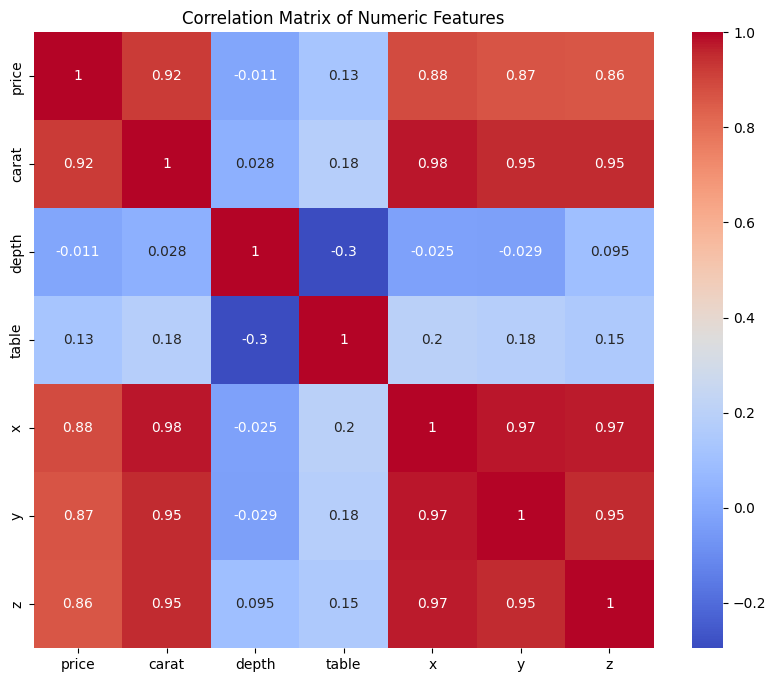

In [27]:
correlation_matrix = cleaned_data[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

`carat`与`price`的关系，按`cut`分类显示不同颜色

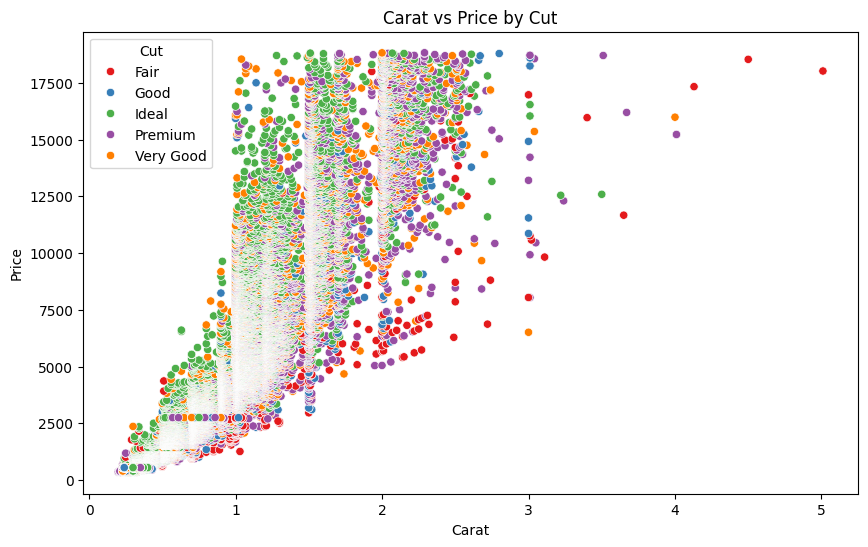

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='cut', data=cleaned_data, palette='Set1')
plt.title('Carat vs Price by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()

`depth` 与 `price` 的关系，按 `cut` 分类显示不同颜色

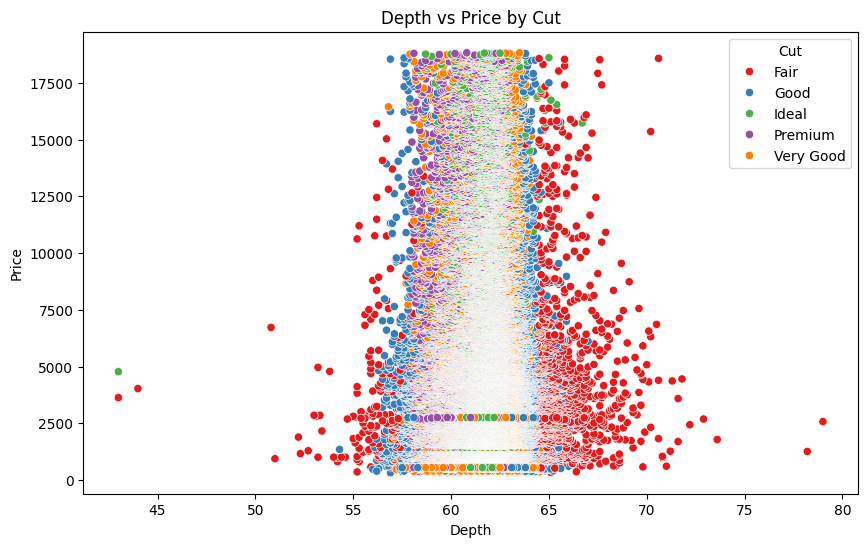

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='price', hue='cut', data=cleaned_data, palette='Set1')
plt.title('Depth vs Price by Cut')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()

`carat`与 `price` 的关系，按 `color` 分类显示不同颜色

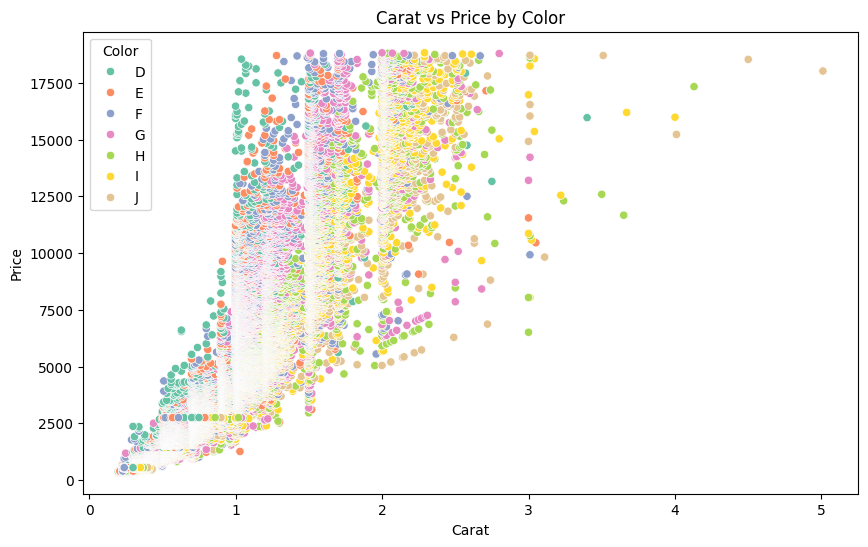

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='color', data=cleaned_data, palette='Set2')
plt.title('Carat vs Price by Color')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Color')
plt.show()

`carat` 与 `price` 的关系，按 `clarity` 分类显示不同颜色

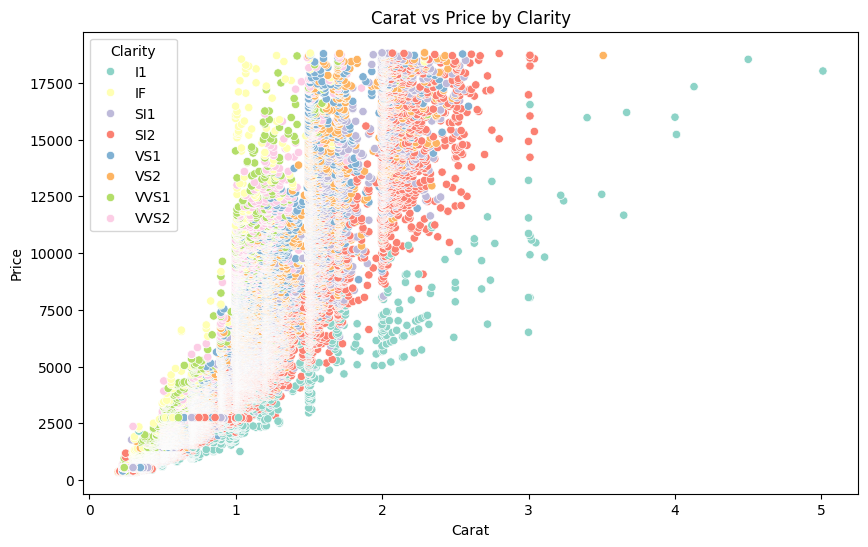

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='clarity', data=cleaned_data, palette='Set3')
plt.title('Carat vs Price by Clarity')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Clarity')
plt.show()

### 回归分析

克拉重和价格之间的线性关系

In [25]:
import statsmodels.api as sm

# 自变量（克拉重）和因变量（价格）
X = cleaned_data[['carat']]
y = cleaned_data['price']

# 添加常数项（截距）
X = sm.add_constant(X)

# 构建回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:36:15   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0